# Data Exploration of InsideAirbnb.com listings for NY and London


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from rnd.domain.poc.city import AvailableCity
from rnd.rbnb.data_provider import load_rbnb_listing_data

ny_data = load_rbnb_listing_data(AvailableCity.NEW_YORK)
london_data = load_rbnb_listing_data(AvailableCity.LONDON)


In [3]:
# New York
print("\nNew York Listings - Info:")
print(ny_data.info())



New York Listings - Info:
<class 'pandas.core.frame.DataFrame'>
Index: 37782 entries, 0 to 37783
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      37782 non-null  int64  
 1   listing_url             37782 non-null  object 
 2   name                    37782 non-null  object 
 3   description             36809 non-null  object 
 4   host_id                 37782 non-null  int64  
 5   host_is_superhost       37782 non-null  bool   
 6   neighbourhood_cleansed  37782 non-null  object 
 7   latitude                37782 non-null  float64
 8   longitude               37782 non-null  float64
 9   property_type           37782 non-null  object 
 10  room_type               37782 non-null  object 
 11  accommodates            37782 non-null  int64  
 12  bathrooms               22985 non-null  float64
 13  bedrooms                31974 non-null  float64
 14  beds            

In [4]:
print("\nLondon Listings - Info:")
print(london_data.info())


London Listings - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95144 entries, 0 to 95143
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      95144 non-null  int64  
 1   listing_url             95144 non-null  object 
 2   name                    95144 non-null  object 
 3   description             92196 non-null  object 
 4   host_id                 95144 non-null  int64  
 5   host_is_superhost       95144 non-null  bool   
 6   neighbourhood_cleansed  95144 non-null  object 
 7   latitude                95144 non-null  float64
 8   longitude               95144 non-null  float64
 9   property_type           95144 non-null  object 
 10  room_type               95144 non-null  object 
 11  accommodates            95144 non-null  int64  
 12  bathrooms               62744 non-null  float64
 13  bedrooms                82794 non-null  float64
 14  beds         

In [5]:
all_listings = pd.concat([ny_data, london_data], ignore_index=True)
all_listings['data_status'] = all_listings.notna().all(axis=1).map({True: 'Complete', False: 'Incomplete'})


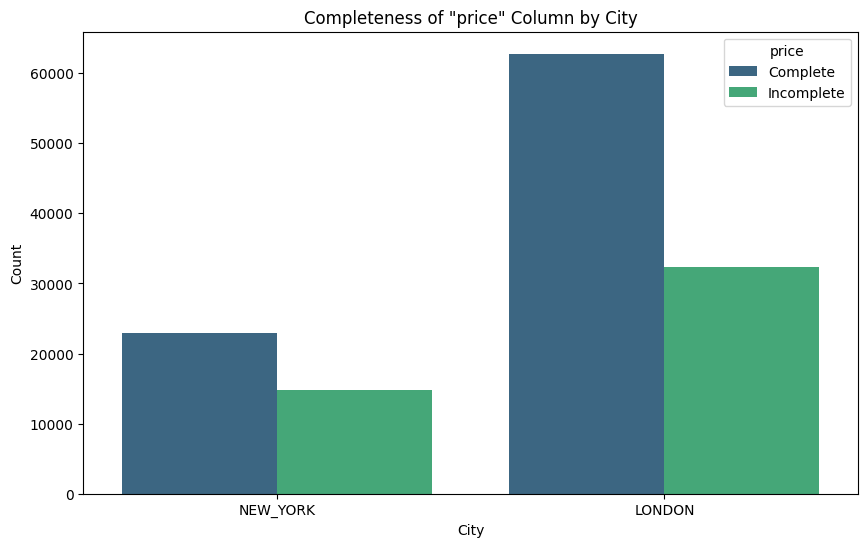

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=all_listings,
    x='city',
    hue=all_listings['price'].isna().map({True: 'Incomplete', False: 'Complete'}),
    palette='viridis'
)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Completeness of "price" Column by City')
plt.show()


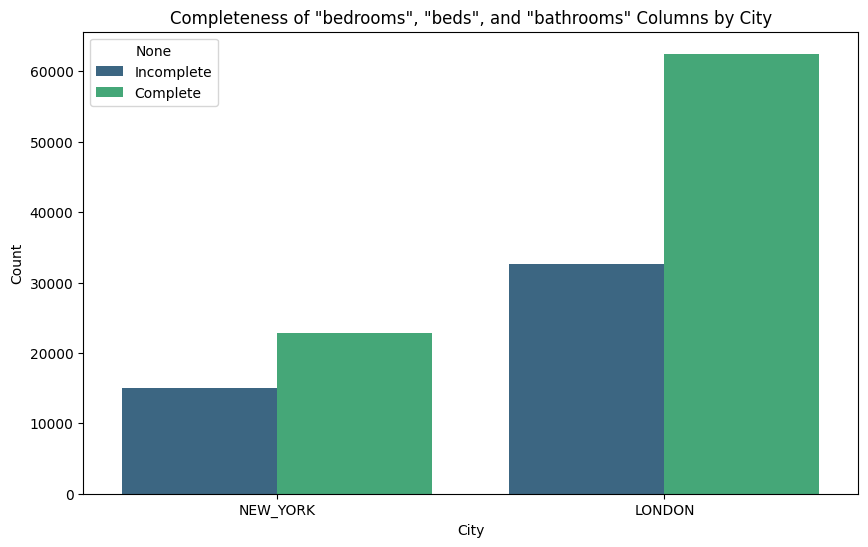

In [9]:
missing_bed_data = all_listings[['bedrooms', 'beds', 'bathrooms']].isna().any(axis=1)

plt.figure(figsize=(10, 6))

sns.countplot(
    data=all_listings,
    x='city',
    hue=missing_bed_data.map({True: 'Incomplete', False: 'Complete'}),
    palette='viridis'
)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Completeness of "bedrooms", "beds", and "bathrooms" Columns by City')
plt.show()


       city  count  nan_count        mean  median  min      max         std
0    LONDON  62777      32367  207.141581   134.0  1.0  80000.0  774.707797
1  NEW_YORK  22969      14813  195.224128   132.0  8.0  20000.0  353.251037


/var/folders/zk/ss0jnd753_q71r6vf8dgd0nm0000gn/T/ipykernel_15074/3518765710.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


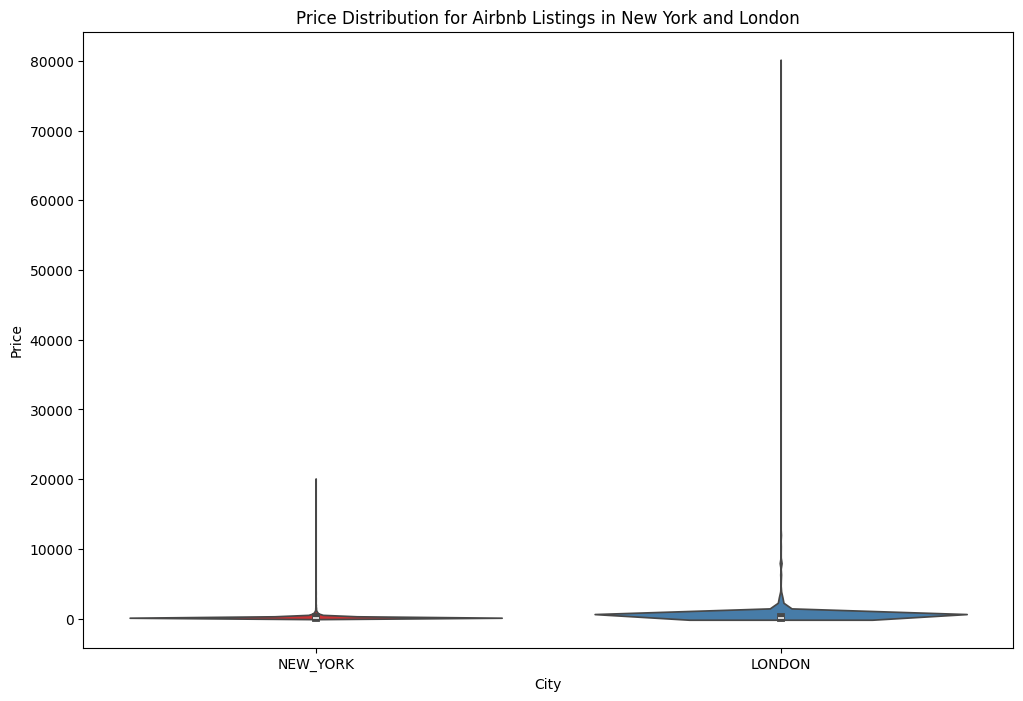

In [17]:
price_summary = all_listings.groupby('city')['price'].agg(
    count='count',
    nan_count=lambda x: x.isna().sum(),
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print(price_summary)



plt.figure(figsize=(12, 8))

sns.violinplot(
    data=all_listings,
    x='city',
    y='price',
    palette='Set1'
)

plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution for Airbnb Listings in New York and London')

plt.show()


       city  count  nan_count        mean  median  min    max        std
0    LONDON  58480          0  144.559439   125.0  1.0  422.0  87.720125
1  NEW_YORK  21505          0  147.709509   125.0  8.0  422.0  88.972629


/var/folders/zk/ss0jnd753_q71r6vf8dgd0nm0000gn/T/ipykernel_15074/860953171.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


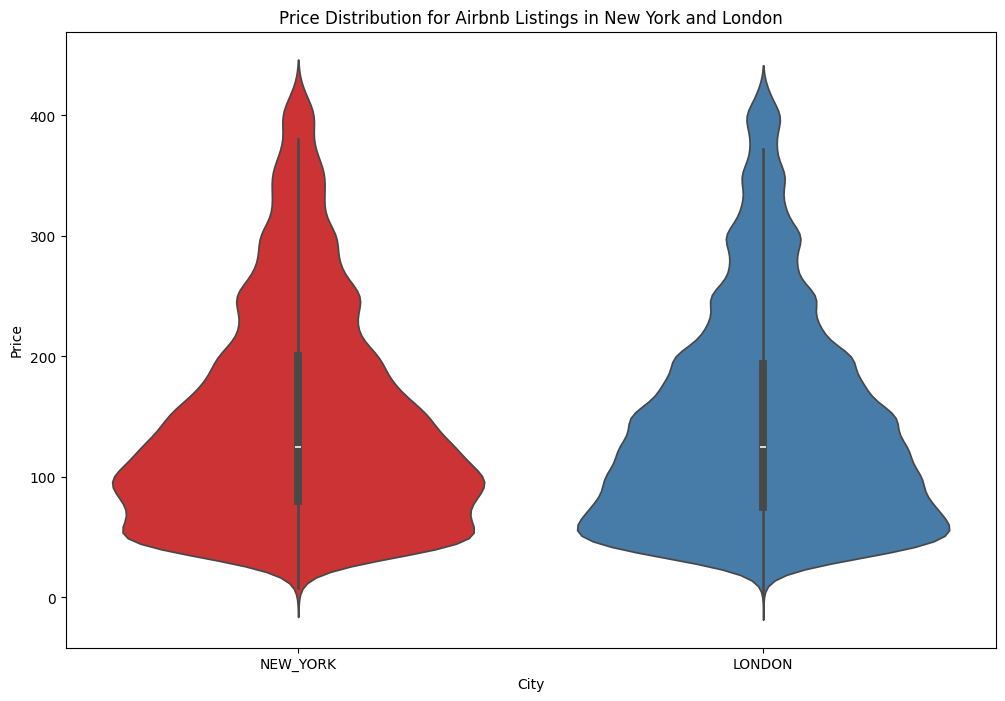

In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

cleaned_listings = remove_outliers(all_listings, 'price')
price_summary = cleaned_listings.groupby('city')['price'].agg(
    count='count',
    nan_count=lambda x: x.isna().sum(),
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print(price_summary)

plt.figure(figsize=(12, 8))

sns.violinplot(
    data=cleaned_listings,
    x='city',
    y='price',
    palette='Set1'
)

plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution for Airbnb Listings in New York and London')

plt.show()



In [51]:
import geopandas as gpd
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

def plot_map_with_price(df, city_name):
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(column='price', cmap='viridis', legend=True, markersize=0.5, alpha=0.3, ax=ax)
    ctx.add_basemap(ax, crs=gdf.crs)

    plt.title(f'Property Prices by Location in {city_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


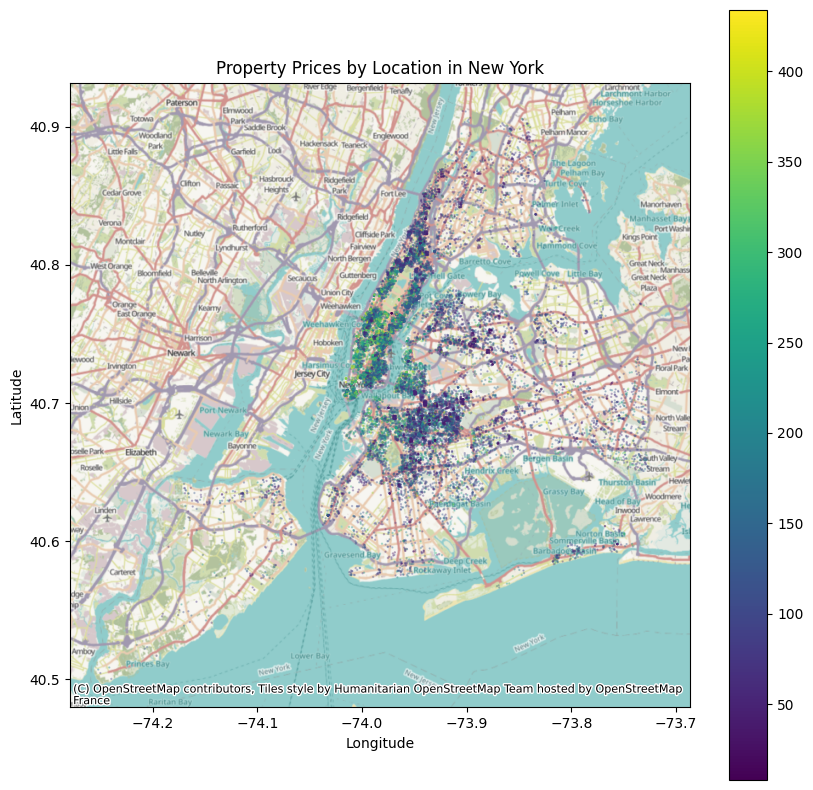

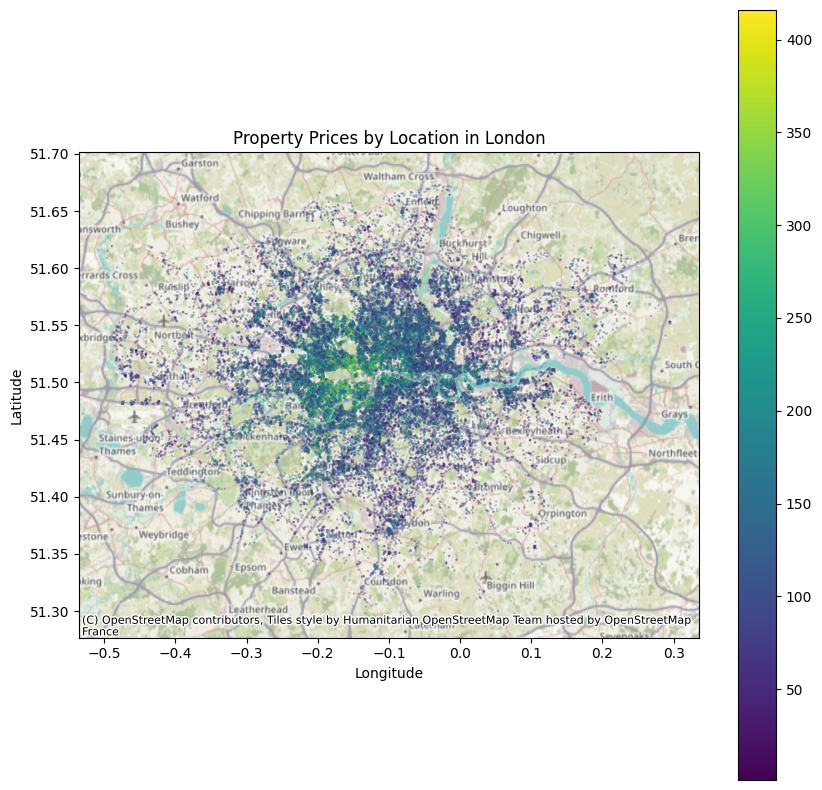

In [52]:
plot_map_with_price(remove_outliers(ny_data, 'price'), 'New York')
plot_map_with_price(remove_outliers(london_data, 'price'), 'London')
